In [1]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
MY_PATH = ''
data_file = MY_PATH + 'diabetes.csv'

In [3]:
#read data
df=pd.read_csv(data_file)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#separate target feature(y) and prector features(X)
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [9]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


### Train-Test Hold out Split
* used random number of neighbours (example:5)

In [10]:
!pip install fast_ml

In [11]:
%%time
from sklearn.model_selection import train_test_split
from fast_ml.model_development import train_valid_test_split

#Train-test holdout split wih test_size = 40%
#X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target='Outcome', train_size=0.8, valid_size=0.1, test_size=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

print([X_train.shape, y_train.shape])
#print([X_valid.shape, y_valid.shape])
print([X_test.shape, y_test.shape])

#using kNN with n_neighbours=5(chose 5 randomly)
knn = KNeighborsClassifier(n_neighbors=5)
#Fit the model
knn.fit(X_train,y_train)
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

[(460, 8), (460,)]
[(308, 8), (308,)]
CPU times: total: 719 ms
Wall time: 735 ms


0.6948051948051948

In [ ]:
X_train.shape

### Finding the best no of neighbours(k) to use with kNN - manually using a basic loop

In [12]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,11)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn1 = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn1.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn1.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn1.score(X_test, y_test) 

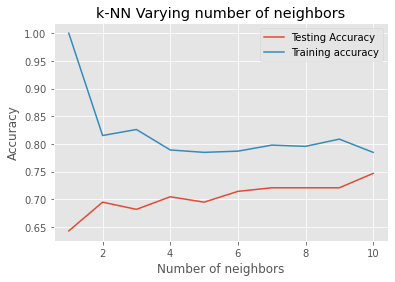

In [13]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [14]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_accuracy)
test_scores_ind = [i for i, v in enumerate(test_accuracy) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 74.67532467532467 % and k = [10]


### Train_Test-Holdout-40% and kNN with the above found k

In [18]:
%%time
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

#X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(df, target='Outcome', train_size=0.6, valid_size=0.1, test_size=0.1)
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

print([X_train.shape, y_train.shape])
print([X_test.shape, y_test.shape])

knn2 = KNeighborsClassifier(n_neighbors=10)
#Fit the model
knn2.fit(X_train,y_train)
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn2.score(X_test,y_test)

[(460, 8), (460,)]
[(308, 8), (308,)]
CPU times: total: 0 ns
Wall time: 10 ms


0.7207792207792207

### K-Fold Crossvalidation - KFold-5 and KNN with the above found k
*No of folds were randomly choosen(=5)

In [19]:
#using k-fold corss validation and kNN classifier - without Scaling
kfold = KFold(n_splits=5, random_state=2, shuffle=True)
model1 = KNeighborsClassifier(n_neighbors=10)
results = cross_val_score(model1, X, y, cv=kfold)
print(results.mean())

0.7513284101519396


### Using Scalers

In [20]:
df_model = df.copy()
features = list(df_model.columns)
#selecting the preditor features
features = [features[:-1]]
print(features)

[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]


#### Using MinMax Scaler

In [21]:
#declaring the MinMaxScaler
scaler = MinMaxScaler()

#scale each predictor feature
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

df_model.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [22]:
#Create KNN Object
knn = KNeighborsClassifier()

#Separate Predictors(X) and Targets(y)
X = df_model.iloc[:,0:8]
y = df_model.iloc[:,8]

X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [62]:
#run kNN(k=3) with KFolds=5
kfold = KFold(n_splits=5, random_state=2, shuffle=True)
model2 = KNeighborsClassifier(n_neighbors=10)
results = cross_val_score(model2, X, y, cv=kfold)
print(results.mean())

0.7357609710550886


#### Using Robust Scaler

In [63]:
df_model = df.copy()

features = list(df_model.columns)
#print(features)
features = [features[:-1]]

scaler = RobustScaler()
for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

#Create KNN Object
knn = KNeighborsClassifier()

#Separate Predictors(X) and Targets(y)
X = df_model.iloc[:,0:8]
y = df_model.iloc[:,8]

#run kNN(k=3) with KFolds=5
kfold = KFold(n_splits=5, random_state=2, shuffle=True)
model3 = KNeighborsClassifier(n_neighbors=10)
results = cross_val_score(model3, X, y, cv=kfold)
print(results.mean())

0.7409303115185468


#### Using Standard Scaler

In [64]:
df_model = df.copy()

#list(df_model.columns.values.tolist())
#list(df_model.columns.values)
features = list(df_model.columns)
#print(features)
features = [features[:-1]]

#for feature in features:
#    print(feature)

scaler = StandardScaler()

for feature in features:
    df_model[feature] = scaler.fit_transform(df_model[feature])

#Create KNN Object
knn = KNeighborsClassifier()

#Separate Predictors(X) and Targets(y)
X = df_model.iloc[:,0:8]
y = df_model.iloc[:,8]

# kfold = KFold(n_splits=5, random_state=2, shuffle=True)
kfold = KFold(n_splits=5, random_state=2, shuffle=True)
model4 = KNeighborsClassifier(n_neighbors=10)
results = cross_val_score(model4, X, y, cv=kfold)
print(results.mean())

0.7357609710550886


In [ ]:
#get the confusion matrix
#other matrices
#ROC curve

In [26]:
#standardised
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


### Hyperparameter tuning - Which k for kNN is best usign GridSearch

In [27]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [28]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,11)}

In [60]:
knn4 = KNeighborsClassifier()
knn_cv= GridSearchCV(knn4,param_grid,cv=10)
knn_cv.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [61]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7461038961038962
Best Parameters: {'n_neighbors': 9}


In [35]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,11)
folds = np.arange(3,11)
scores = []

for i,kf in enumerate(folds):
    param_grid = {'n_neighbors':np.arange(1,11)}
    knn = KNeighborsClassifier()
    knn_cv= GridSearchCV(knn,param_grid,cv=kf)
    knn_cv.fit(X,y)
    scores.append((kf, knn_cv.best_score_, knn_cv.best_params_.get('n_neighbors')))
    
columns = ['k folds', 'best_score', 'n_neighbours']
best_k_results = pd.DataFrame(scores, columns=columns)


In [36]:
#sort so the last record shows the best score and the optimum number of neighbours and the no of k folds
best_k_results.sort_values(by=['best_score'])

,k folds,best_score,n_neighbours
2,5,0.742254,3
0,3,0.743490,10
4,7,0.743501,8
1,4,0.746094,3
3,6,0.746094,3
7,10,0.746104,9
6,9,0.755236,9
5,8,0.757812,9


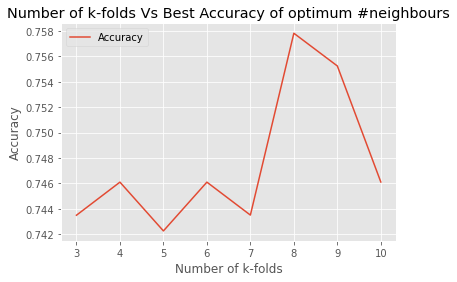

In [37]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#Generate plot
plt.title('Number of k-folds Vs Best Accuracy of optimum #neighbours')
plt.plot(folds, best_k_results['best_score'], label='Accuracy')
plt.legend()
plt.xlabel('Number of k-folds')
plt.ylabel('Accuracy')
plt.show()

In [38]:
!pip install mlxtend

In [ ]:
# importing the models

#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
#from sklearn.linear_model import LinearRegression

In [ ]:
# calling the linear regression model

#lreg = LinearRegression()
#sfs1 = sfs(lreg, k_features=4, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [ ]:
#sfs1 = sfs1.fit(X, y)

In [ ]:
#feat_names = list(sfs1.k_feature_names_)
#print(feat_names)

### Applying Feature Engineering to gain further Accuracy

In [47]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
knn2 = KNeighborsClassifier(n_neighbors=9)
sfs2 = sfs(knn2,
         k_features=(1,8),
         forward=True,
         floating=False,
         verbose=2,
         scoring='accuracy',
         cv=8)
sfs2.fit(X, y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished

[2022-10-19 22:49:11] Features: 1/8 -- score: 0.7018229166666666[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished

[2022-10-19 22:49:11] Features: 2/8 -- score: 0.7486979166666667[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished

[2022-10-19 22:49:11] Features: 3/8 -- score: 0.765625[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1

SequentialFeatureSelector(cv=8, estimator=KNeighborsClassifier(n_neighbors=9),
                          k_features=(1, 8), scoring='accuracy', verbose=2)

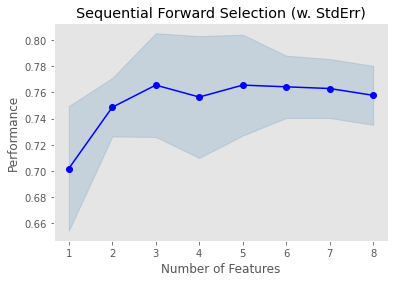

In [48]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs2.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [49]:
sfs2.get_metric_dict()

{1: {'feature_idx': (1,),
  'cv_scores': array([0.64583333, 0.71875   , 0.65625   , 0.63541667, 0.76041667,
         0.73958333, 0.69791667, 0.76041667]),
  'avg_score': 0.7018229166666666,
  'feature_names': ('Glucose',),
  'ci_bound': 0.04158989730699904,
  'std_dev': 0.04771740156721013,
  'std_err': 0.01803548253672025},
 2: {'feature_idx': (1, 5),
  'cv_scores': array([0.77083333, 0.72916667, 0.73958333, 0.70833333, 0.76041667,
         0.73958333, 0.78125   , 0.76041667]),
  'avg_score': 0.7486979166666667,
  'feature_names': ('Glucose', 'BMI'),
  'ci_bound': 0.019492199589424018,
  'std_dev': 0.022364015673590705,
  'std_err': 0.008452803398438808},
 3: {'feature_idx': (0, 1, 5),
  'cv_scores': array([0.8125    , 0.8125    , 0.72916667, 0.70833333, 0.80208333,
         0.71875   , 0.77083333, 0.77083333]),
  'avg_score': 0.765625,
  'feature_names': ('Pregnancies', 'Glucose', 'BMI'),
  'ci_bound': 0.034571946303418255,
  'std_dev': 0.03966548492637453,
  'std_err': 0.01499214410